# Linear Classification

In [1]:
# Author: Afzal Ahmad
# Date: 2 April 2019
# Used for code demonstration in COMP2420 lecture

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import datasets, metrics
from sklearn.linear_model import SGDClassifier
from scipy import stats

%matplotlib inline
np.random.seed(1)

In [3]:
# grabbing the iris dataset
iris = datasets.load_iris()
# Sepal Length, Sepal Width
X = iris.data[:,:2]
# Iris type (Setosa=0, Versicolour=1, Virginica=2)
y = iris.target
iris_np = np.column_stack((X, y))

In [4]:
iris_np[:10]

array([[5.1, 3.5, 0. ],
       [4.9, 3. , 0. ],
       [4.7, 3.2, 0. ],
       [4.6, 3.1, 0. ],
       [5. , 3.6, 0. ],
       [5.4, 3.9, 0. ],
       [4.6, 3.4, 0. ],
       [5. , 3.4, 0. ],
       [4.4, 2.9, 0. ],
       [4.9, 3.1, 0. ]])

In [5]:
# for the purpose of the exercise, let's split this up so we have data to test on
# first we need to shuffle the data so we have a good proportion in each split
iris_np = np.column_stack((X, y))
np.random.shuffle(iris_np)
X = iris_np[:,:2]
y = iris_np[:,-1]

# now we split it
length = X.shape[0]
X_train = X[:int(length*0.8)]
y_train = y[:int(length*0.8)]
X_test = X[int(length*0.8):]
y_test = y[int(length*0.8):]

# looking at the shapes to make sure we got it right
print("training:", X_train.shape, y_train.shape)
print("testing:", X_test.shape, y_test.shape)

training: (120, 2) (120,)
testing: (30, 2) (30,)


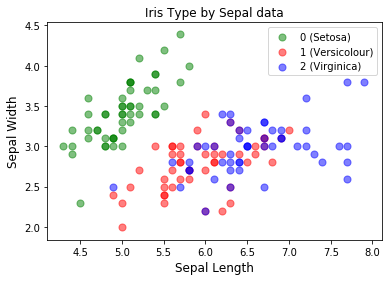

In [6]:
sep_len = X[:,0]
sep_wid = X[:,1]

plt.figure(figsize=(6,4))
colors = ['green', 'red', 'blue']
handles = []
for i in range(3):
    handle = plt.scatter(sep_len[y==i], sep_wid[y==i], c=colors[i], alpha=0.5, s=50)
    handles.append(handle)

plt.ylabel("Sepal Width",fontsize=12)
plt.xlabel("Sepal Length",fontsize=12)
plt.title('Iris Type by Sepal data', fontsize=12)

plt.legend(handles, ("0 (Setosa)", "1 (Versicolour)", "2 (Virginica)"), fontsize=10)
plt.show()

In [7]:
# scaling is necessary for linear classification
# scale with respect to X_train
scaling = sk.preprocessing.StandardScaler().fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

Text(0,0.5,'Sepal width')

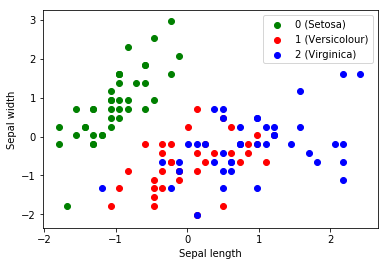

In [8]:
sep_len_tr = X_train[:,0]
sep_wid_tr = X_train[:,1]

handles = []
for i in range(3):
    handle = plt.scatter(sep_len_tr[y_train == i], sep_wid_tr[y_train == i], c=colors[i])
    handles.append(handle)

plt.legend(handles, ("0 (Setosa)", "1 (Versicolour)", "2 (Virginica)"), fontsize=10)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [9]:
np.random.seed(2)

classifier = SGDClassifier(max_iter=50, tol=1e-3)
classifier.fit(X_train, y_train)

print("Classifier Coefficients:\n", classifier.coef_)
print("\nClassifier Intercepts:\n", classifier.intercept_)

Classifier Coefficients:
 [[-18.69694592  19.68543427]
 [  7.88728689   1.4608191 ]
 [ 13.20954233   3.13032664]]

Classifier Intercepts:
 [-18.65929699  -9.74701818  -9.22673185]


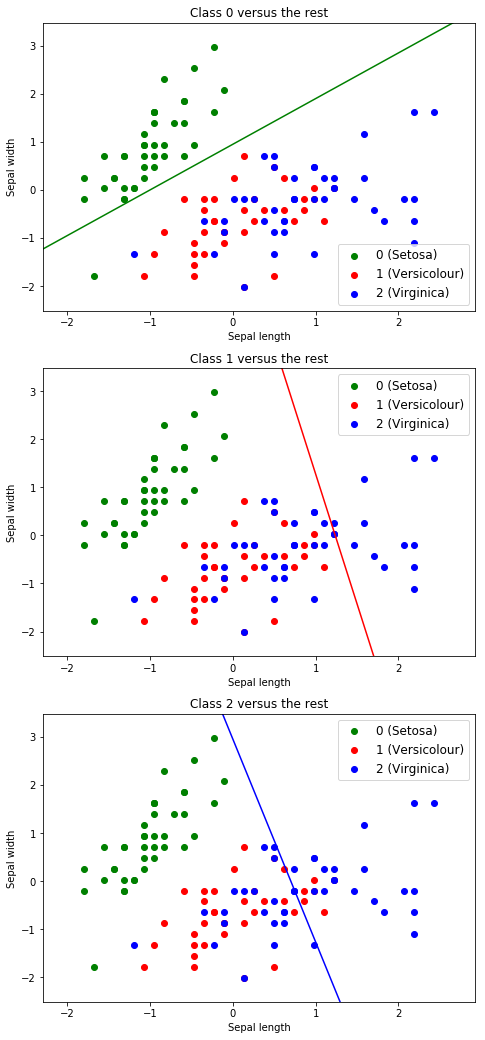

In [10]:
x_min, x_max = sep_len_tr.min()-0.5, sep_len_tr.max()+0.5
y_min, y_max = sep_wid_tr.min()-0.5, sep_wid_tr.max()+0.5

x_classifier = np.arange(sep_len_tr.min()-0.5, sep_len_tr.max()+0.5)

colors = ['green', 'red', 'blue']
fig = plt.figure()
for i in range(3):
    ax = fig.add_axes([0,2-(i*1.2),1,1])
    for j in range(3):
        plt.scatter(sep_len_tr[y_train == j], sep_wid_tr[y_train == j], c=colors[j])
    y_classifier = (-classifier.intercept_[i] - x_classifier*classifier.coef_[i,0]) / classifier.coef_[i,1]
    ax.plot(x_classifier, y_classifier, c=colors[i])
    
    ax.set_title('Class ' + str(i) + ' versus the rest')
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.legend(handles, ("0 (Setosa)", "1 (Versicolour)", "2 (Virginica)"), fontsize=12)
plt.show()